In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as pilimg
from tensorflow.examples.tutorials.mnist import input_data

## Load MNIST data sets

In [3]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## Define Generator, Discriminator's Variables

In [4]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28 * 28
n_noise = 128

In [5]:
X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

In [6]:
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev = 0.01))
G_B1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev = 0.01))
G_B2 = tf.Variable(tf.zeros([n_input]))

In [7]:
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev = 0.01))
D_B1 = tf.Variable(tf.zeros([n_hidden]))
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev = 0.01))
D_B2 = tf.Variable(tf.zeros([1]))

## Define Generator

In [8]:
def generator(noise):
    hidden = tf.nn.relu(tf.matmul(noise, G_W1) + G_B1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_B2)
    
    return output

## Define Discriminiator

In [9]:
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_B1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_B2)
    
    return output

## Make noises

In [10]:
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

In [11]:
G = generator(Z)
D_gene = discriminator(G)
D_real = discriminator(X)

In [2]:
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
#loss_G = tf.reduce_mean(1 - tf.log(D_gene)) 을 최소화 하는 방향으로 진행해야 하지만 학습초기에 D_gene은 0에 가깝다
#따라서 loss_G 는 0에 가깝게 되고 학습이 잘 이루어 지지 않는다 따라서 tf.reduce_mean(tf.log(D_gene))을 최대화 하는 방향으로 진행한다.
loss_G = tf.reduce_mean(tf.log(D_gene))

NameError: name 'tf' is not defined

In [13]:
G_list = [G_W1, G_B1, G_W2, G_B2]
D_list = [D_W1, D_B1, D_W2, D_B2]

In [14]:
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_list)

## Training

Epoch: 0000 D loss: -0.5575 G loss: -1.958
Epoch: 0001 D loss: -0.2627 G loss: -2.595
Epoch: 0002 D loss: -0.08394 G loss: -3.393
Epoch: 0003 D loss: -0.5952 G loss: -1.6
Epoch: 0004 D loss: -0.3485 G loss: -2.131
Epoch: 0005 D loss: -0.2929 G loss: -2.541
Epoch: 0006 D loss: -0.2189 G loss: -2.638
Epoch: 0007 D loss: -0.3395 G loss: -2.489
Epoch: 0008 D loss: -0.3871 G loss: -2.319
Epoch: 0009 D loss: -0.3972 G loss: -2.497
Epoch: 0010 D loss: -0.4953 G loss: -2.359
Epoch: 0011 D loss: -0.367 G loss: -2.456
Epoch: 0012 D loss: -0.4123 G loss: -2.206
Epoch: 0013 D loss: -0.3155 G loss: -2.566
Epoch: 0014 D loss: -0.3289 G loss: -2.587
Epoch: 0015 D loss: -0.3479 G loss: -2.509
Epoch: 0016 D loss: -0.4145 G loss: -2.766
Epoch: 0017 D loss: -0.3514 G loss: -2.324
Epoch: 0018 D loss: -0.4031 G loss: -2.447
Epoch: 0019 D loss: -0.48 G loss: -2.442
Epoch: 0020 D loss: -0.6576 G loss: -2.201
Epoch: 0021 D loss: -0.4021 G loss: -2.822
Epoch: 0022 D loss: -0.3678 G loss: -2.729
Epoch: 0023 D l

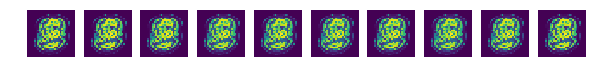

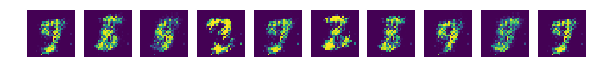

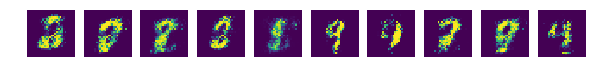

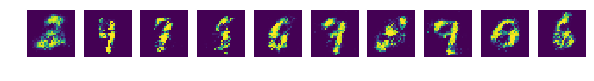

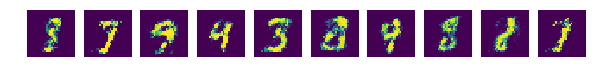

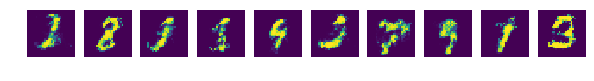

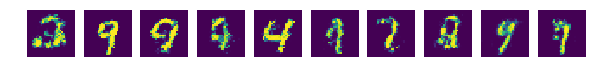

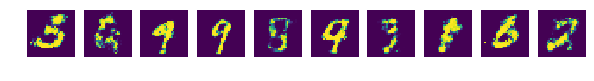

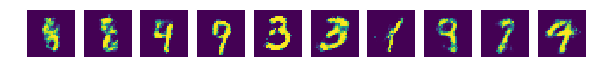

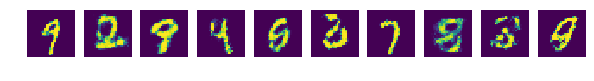

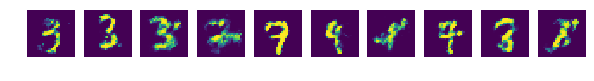

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/ batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X:batch_xs, Z:noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z:noise})
        
    print('Epoch:', '%04d'%epoch, 'D loss: {:.4}'.format(loss_val_D), 'G loss: {:.4}'.format(loss_val_G))
    
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z:noise})
        
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))
        
        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))
            
            plt.savefig('./GAN_samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')